<a href="https://colab.research.google.com/github/LanucciG/ml_car_prices/blob/main/Ml_cars_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAR PRICE

## Biblioteca

In [79]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [80]:
uri= "https://raw.githubusercontent.com/paolasouza/data_mining_and_big_data/ec70f701a784820fa6ca326c0d51d8740028da03/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

## Renomeando Colunas

In [81]:
mapa = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_modelo",
    "price" : "preco",
    "sold" : "vendido"
}
dados = dados.rename(columns = mapa)

In [82]:
a_trocar = {
    "no" : 0,
    "yes" : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

Unnamed: 0  milhas_por_ano  ano_modelo      preco  vendido
0           0           21801        2000   30941.02        1
1           1            7843        1998   40557.96        1
2           2            7109        2006   89627.50        0
3           3           26823        2015   95276.14        0
4           4            7935        2014  117384.68        1

## Criando novas colunas

In [83]:
import datetime
ano_atual = datetime.datetime.today().year
dados["idade_do_modelo"] = ano_atual - dados.ano_modelo
dados.head()

Unnamed: 0  milhas_por_ano  ano_modelo      preco  vendido  idade_do_modelo
0           0           21801        2000   30941.02        1               24
1           1            7843        1998   40557.96        1               26
2           2            7109        2006   89627.50        0               18
3           3           26823        2015   95276.14        0                9
4           4            7935        2014  117384.68        1               10

## Convertendo Coluna

In [84]:
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados.head()

Unnamed: 0  milhas_por_ano  ano_modelo      preco  vendido  \
0           0           21801        2000   30941.02        1   
1           1            7843        1998   40557.96        1   
2           2            7109        2006   89627.50        0   
3           3           26823        2015   95276.14        0   
4           4            7935        2014  117384.68        1   

   idade_do_modelo   km_por_ano  
0               24  35085.22134  
1               26  12622.05362  
2               18  11440.79806  
3                9  43167.32682  
4               10  12770.11290

## Excluindo Colunas

In [85]:
dados = dados.drop(["Unnamed: 0", "milhas_por_ano", "ano_modelo"], axis=1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               24  35085.22134
1   40557.96        1               26  12622.05362
2   89627.50        0               18  11440.79806
3   95276.14        0                9  43167.32682
4  117384.68        1               10  12770.11290

## Balanceamento dos Dados

In [86]:
dados.vendido.value_counts()

vendido
1    5800
0    4200
Name: count, dtype: int64

## Plotando Gráfico

In [87]:
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               24  35085.22134
1   40557.96        1               26  12622.05362
2   89627.50        0               18  11440.79806
3   95276.14        0                9  43167.32682
4  117384.68        1               10  12770.11290

<Axes: xlabel='idade_do_modelo', ylabel='preco'>

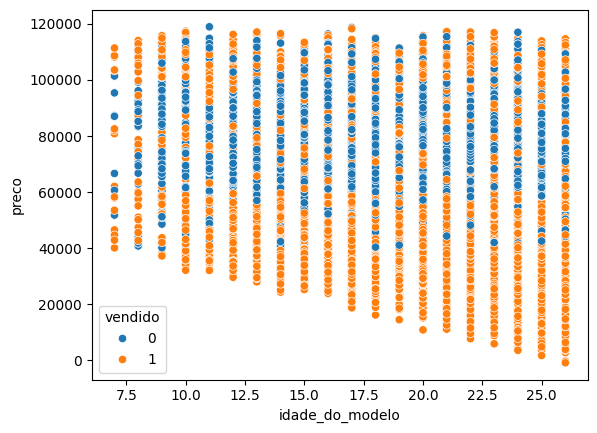

In [88]:
import seaborn as sns

sns.scatterplot(x="idade_do_modelo", y="preco", hue="vendido", data=dados)

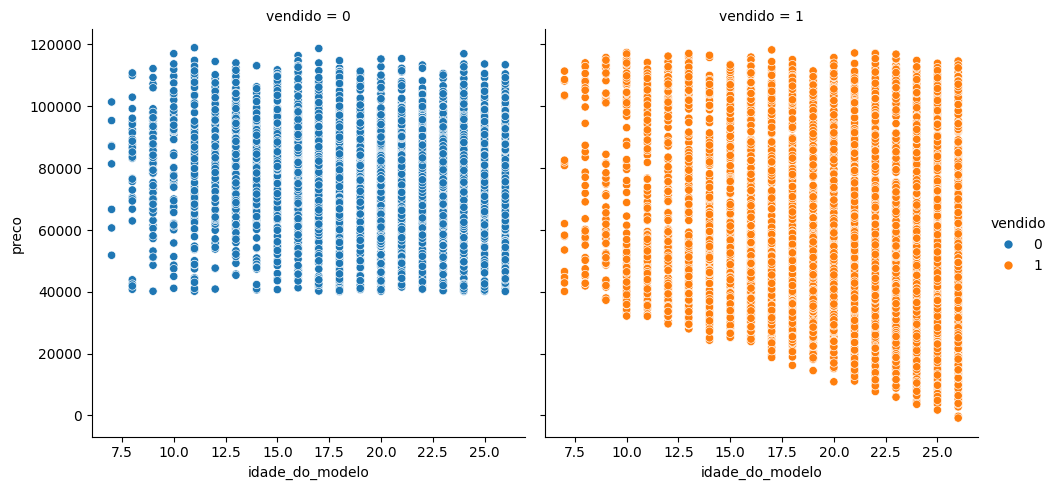

In [89]:
sns.relplot(x="idade_do_modelo", y="preco", hue="vendido", col="vendido", data=dados)

## Classificação Binária

- CLASSES (Y) -> BOUGHT (1/0) -> CLASSIFICAÇÃO BINÁRIA

- FREATURE NÃO DEFINE SE CLASSIFICAÇÃO É BINÁRIA

In [90]:
x = dados[["km_por_ano", "idade_do_modelo", "preco"]] #features
y = dados["vendido"] # classes

In [91]:
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               24  35085.22134
1   40557.96        1               26  12622.05362
2   89627.50        0               18  11440.79806
3   95276.14        0                9  43167.32682
4  117384.68        1               10  12770.11290

## Teste 1 - Linear SVC

In [101]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR
modelo = LinearSVC(random_state=seed) # cria um modelo
modelo.fit(treino_x, treino_y) #treina

previsoes = modelo.predict(teste_x) # teste
acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores

acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%
A acurácia foi 58.00%


### Plotando Gráfico do Modelo

<Axes: xlabel='idade_do_modelo', ylabel='preco'>

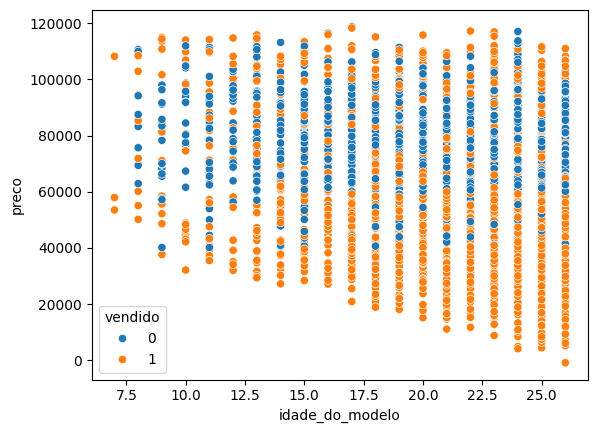

In [102]:
sns.scatterplot(x="idade_do_modelo", y="preco", hue=teste_y, data=teste_x)

### Comparação Acurácia Dummy


In [103]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) # imprime acuracia

A acurácia do dummy stratified foi 58.00%


## Teste 2 - SVC

In [104]:
from math import gamma
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y, random_state=seed) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR

# trocar modelo = LinearSVC()
modelo = SVC(gamma="auto", random_state=seed) # gamma "auto" para adaptar a curva
modelo.fit(treino_x, treino_y) # treina o modelo
previsoes = modelo.predict(teste_x) # teste

acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores
acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%
A acurácia foi 58.00%


### Plotando Gráfico do Modelo

<Axes: xlabel='idade_do_modelo', ylabel='preco'>

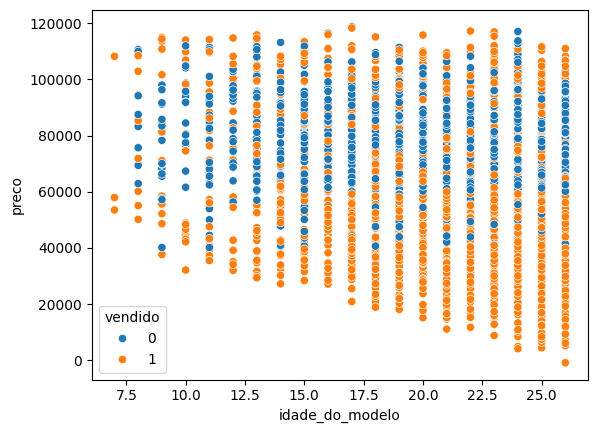

In [105]:
sns.scatterplot(x="idade_do_modelo", y="preco", hue=teste_y, data=teste_x)

### Comparação Acurácia Dummy

In [106]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 58.00%


## Teste 3 - StandardScaler

In [107]:
from math import gamma
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#SEPARAR TREINO E TESTE
# Seed vai separar sempre o mesmo conjunto de dados para acurácia fixa
seed = 20 # pode ser qualquer valor fixo
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y, random_state=seed) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#Transformação das escalas
scaler = StandardScaler()
scaler.fit(raw_treino_x) # criando o normalizador treinando com o raw_treino_x
treino_x = scaler.transform(raw_treino_x) # treino x normalizado - escalas iguais
teste_x = scaler.transform(raw_teste_x) # teste x normalizado - escalas iguais

#CLASSIFICADOR
modelo = SVC(gamma="auto", random_state=seed) # gamma "auto" para adaptar a curva
modelo.fit(treino_x, treino_y) # treina o modelo
previsoes = modelo.predict(teste_x) # teste

acuracia = accuracy_score(teste_y, previsoes) * 100 # compara vetores
acuracia_model_score = modelo.score(teste_x,teste_y) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)
print("A acurácia foi %.2f%%" % acuracia_model_score)

Treinamento com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 75.92%
A acurácia foi 75.92%


### Comparação Acurácia Dummy

In [108]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()      # Criar modelo
dummy_stratified.fit(treino_x, treino_y)  # Treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 # teste modelo (acurácia)
print("A acurácia do dummy stratified foi %.2f%%" % acuracia) #imprime acuracia

A acurácia do dummy stratified foi 58.00%


### Decision Tree Classifier

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

seed = 5 # pode ser qualquer valor fixo
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y) # dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#CLASSIFICADOR
modelo = DecisionTreeClassifier(random_state=seed) # cria um modelo de árvore de decisão
modelo.fit(raw_treino_x, treino_y) #treina

previsoes = modelo.predict(raw_teste_x) # teste

acuracia = modelo.score(raw_teste_x,previsoes) * 100 # roda teste

print("A acurácia foi %.2f%%" % acuracia)

Treinamento com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 100.00%


In [115]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, feature_names=features, class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

In [118]:
carro = [20000, 3, 70000] # km_por_ano, idade_do_modelo_, preço
modelo.predict([carro])

array([0])